In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('PH_Weather_v1.csv')
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


# 1. What is the dimensionality or shape of the data? ( 1pt )

In [ ]:
df.shape

(90565, 11)

The data has 90565 entries (rows) and is described by 11 features (columns)

# 2. What is mean temperature for the year 2017? ( 3pts )

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format = "%Y%m%d%H%M") # this format is inferred from the datetime column in df.head() above
df['year'] = df['datetime'].dt.year

In [ ]:
df[df['year'] == 2017]['temperature'].mean() 

27.93335635359116

Hence, the mean temperature for the year 2017 is 27.933356 degree Celsius

# 3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

We first take a look at our features' data types.

In [ ]:
df.dtypes

datetime              datetime64[ns]
wind_direction                 int64
wind_speed                     int64
gust_speed                   float64
sea_level_pressure           float64
temperature                    int64
altitude                     float64
precipitation                float64
clouds                        object
visibility                   float64
humidity                     float64
year                           int64
dtype: object

We use df.describe() to better look at our data.

In [ ]:
df.describe()

,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity,year
count,90565.000000,90565.000000,1.0,90565.000000,90565.000000,0.0,13.000000,90565.000000,90565.000000,90565.000000
mean,173.856678,5.879711,46.0,1003.910391,27.927687,NaN,0.267692,5.262749,0.747014,2000.891625
std,109.008947,4.331033,NaN,76.938968,2.291318,NaN,0.350931,2.756238,0.126518,10.730728
min,0.000000,0.000000,46.0,0.000000,-3.000000,NaN,0.040000,0.000000,-0.440000,1978.000000
25%,90.000000,4.000000,46.0,1007.900000,26.000000,NaN,0.040000,3.100000,0.660000,1992.000000
50%,180.000000,4.000000,46.0,1009.700000,28.000000,NaN,0.080000,5.000000,0.770000,2002.000000
75%,250.000000,9.000000,46.0,1011.700000,30.000000,NaN,0.280000,7.500000,0.830000,2010.000000
max,990.000000,94.000000,46.0,1074.300000,52.000000,NaN,1.140000,43.800000,1.000000,2018.000000


From this, we see that there is only one value for gust speed, while there are no values at all for altitude. Hence, we exclude them in the training process. We also decide to exclude precipitation, with only 13 non-null values (in a dataset with more than 90,000 rows), since imputation might not be ideal due to the very small proportion of non-null values. We also exclude datetime, since it is not in a numerical data type. Finally, we notice that clouds is a categorical feature. Hence, we proceed with one-hot encoding.

In [ ]:
one_hot_clouds = pd.get_dummies(df['clouds'])
df = pd.concat([df, one_hot_clouds], axis = 1)
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity,year,***,BKN,CLR,OBS,OVC,SCT
0,1978-09-14 03:00:00,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75,1978,0,1,0,0,0,0
1,1978-10-02 15:00:00,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94,1978,0,0,0,0,1,0
2,1978-10-25 21:00:00,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80,1978,0,1,0,0,0,0
3,1978-10-26 00:00:00,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80,1978,0,0,0,0,1,0
4,1978-11-13 15:00:00,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88,1978,0,1,0,0,0,0


In [ ]:
cols = ['wind_direction','wind_speed','sea_level_pressure','visibility','humidity','year', '***', 'BKN', 'CLR', 'OBS', 'OVC', 'SCT']
X = df[cols]
Y = df['temperature']

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pd.Series(data = lin_reg.coef_, index = cols)

wind_direction         0.001505
wind_speed             0.082963
sea_level_pressure    -0.000155
visibility             0.116328
humidity             -11.073511
year                   0.008544
***                    0.835601
BKN                    0.358232
CLR                   -1.260252
OBS                   -0.368461
OVC                    0.439058
SCT                   -0.004178
dtype: float64

The Series object above shows the features along with their corresponding coefficients.

# 4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

From the previous result, we know that humidity has the highest beta coefficient (highest absolute value).

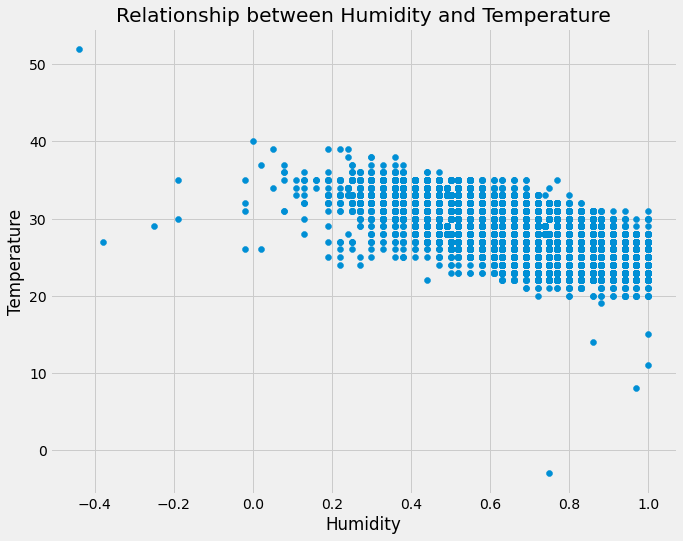

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(df['humidity'], Y)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Relationship between Humidity and Temperature')
plt.show()

# 5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

In [ ]:
mse = np.mean(np.square(Y - lin_reg.predict(X)))
mse

2.7404163642757218

# 6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

In [ ]:
lin_reg.score(X, Y)

0.478023806486767

# 7. Identify if the model is a good model and why. ( 3pts )

Since the R^2 score is closer to 0 than to 1, we can say that it is not a good model. Further improvements to the model could be done, such as feature scaling and other feature extraction processes.

# Bonus 1

I decline to provide an answer haha.